# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [59]:
#Import all the necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [7]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
data=pd.read_csv('pima-indians-diabetes-1.data',names=colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [8]:
data.head(10)

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [9]:
data.dtypes

preg         int64
glu          int64
bp           int64
sft          int64
ins          int64
bmi        float64
dpf        float64
age          int64
outcome      int64
dtype: object

In [10]:
data.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [25]:
#Replace 0 with median for all the columns except for outcome
for col in data.columns.drop('outcome'):
    data[col].replace(0,data[col].median(),inplace=True)

In [26]:
data.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [27]:
data.describe()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [28]:
data['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

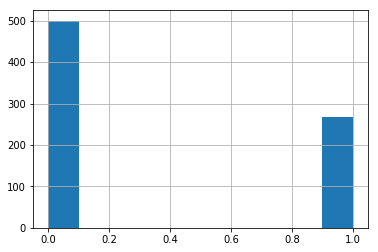

In [29]:
data['outcome'].hist()

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

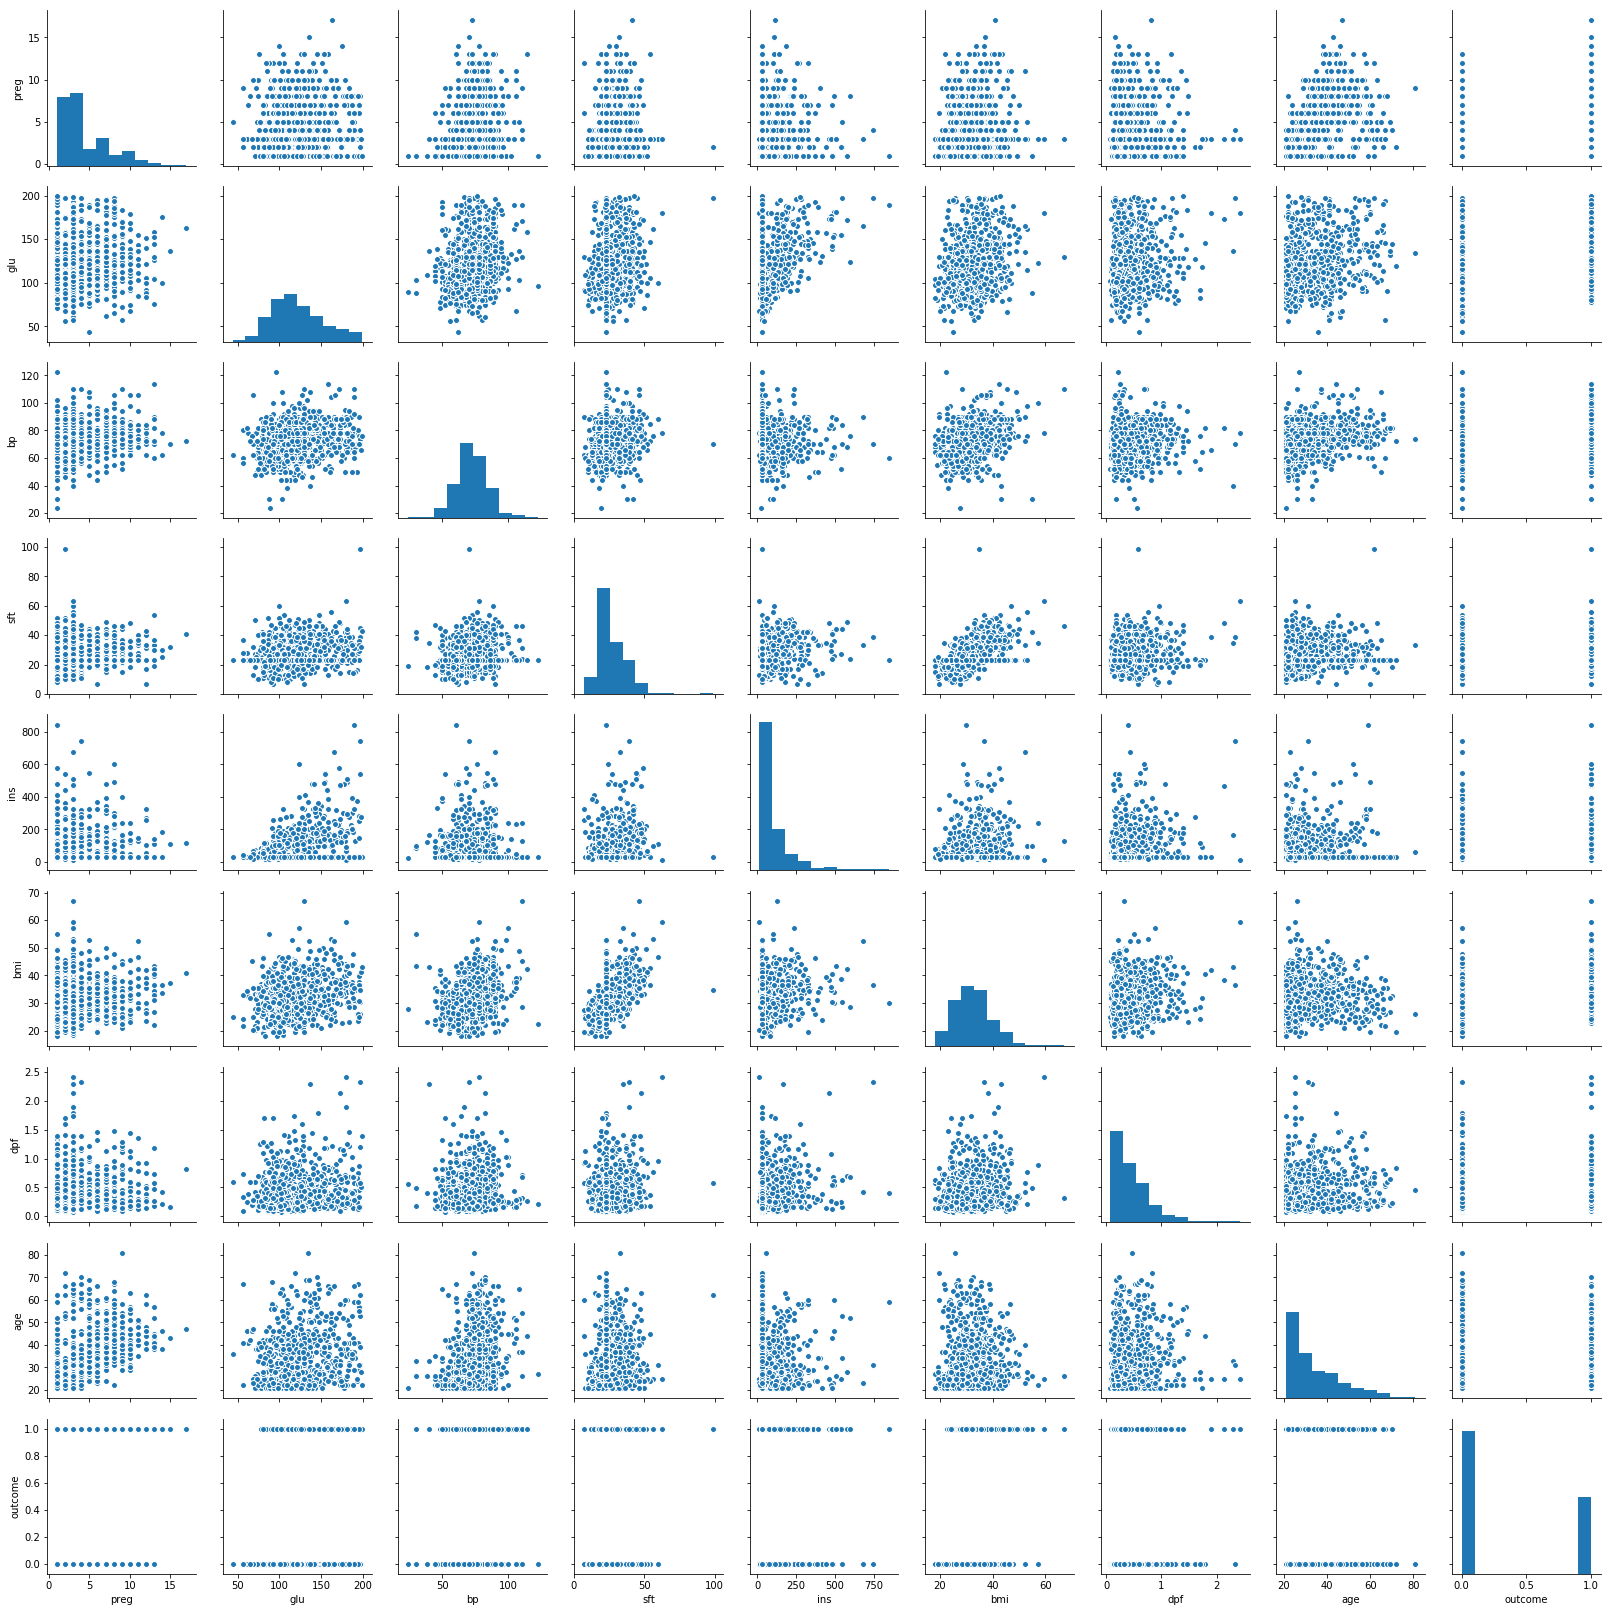

In [31]:
sns.pairplot(data)

<b> From pair plot it is evident that all the variables are almost independent of each other and correlation between them is very less

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [42]:
X=data.drop('outcome',axis=1)
Y=data['outcome']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [50]:
Dt=DecisionTreeClassifier(criterion='entropy')

In [51]:
Dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [54]:
Y_pred=Dt.predict(X_test)
Dt_acc=metrics.accuracy_score(Y_test,Y_pred)
print("Accuracy Score is {0}".format(Dt_acc))

Accuracy Score is 0.696969696969697


In [56]:
cm1=metrics.confusion_matrix(Y_test,Y_pred)
print(cm1)

[[113  33]
 [ 37  48]]


Print the feature importance of the decision model - Optional

In [58]:
Dt.feature_importances_

array([0.0797342 , 0.24469175, 0.1442886 , 0.05436558, 0.01044311,
       0.24869823, 0.10305053, 0.114728  ])

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [62]:
rf=RandomForestClassifier(criterion='entropy')

In [63]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
Y_pred_rf=rf.predict(X_test)
rf_acc=metrics.accuracy_score(Y_test,Y_pred_rf)
print("Accuracy Score is {0}".format(rf_acc))

Accuracy Score is 0.7619047619047619


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [75]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=Dt)
abcl.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [77]:
Y_pred_abcl=abcl.predict(X_test)
abcl_acc=metrics.accuracy_score(Y_test,Y_pred_abcl)
print("Accuracy Score is {0}".format(abcl_acc))

Accuracy Score is 0.7229437229437229


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [70]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=Dt)
bgcl.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [72]:
Y_pred_bgcl=bgcl.predict(X_test)
bgcl_acc=metrics.accuracy_score(Y_test,Y_pred_bgcl)
print("Accuracy Score is {0}".format(bgcl_acc))

Accuracy Score is 0.7922077922077922


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gbcl = GradientBoostingClassifier()
gbcl.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [83]:
Y_pred_gbcl=gbcl.predict(X_test)
gbcl_acc=metrics.accuracy_score(Y_test,Y_pred_gbcl)
print("Accuracy Score is {0}".format(gbcl_acc))

Accuracy Score is 0.7835497835497836


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.